In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.datasets import make_blobs

In [4]:
X,y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0,10.0),
    shuffle=True,
    random_state=True
)

range_n_clusters = [2,3,4,5,6]

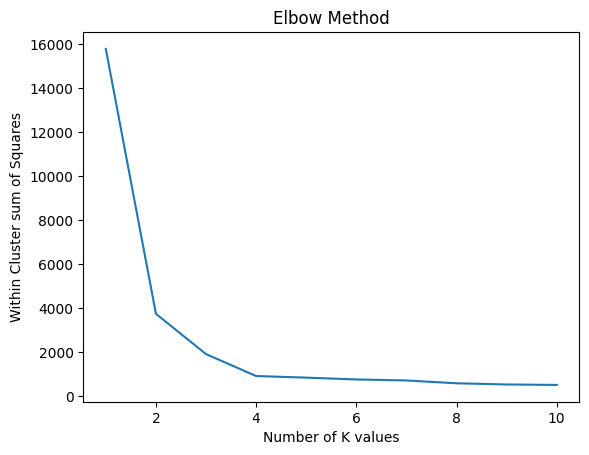

In [9]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of K values')
plt.ylabel('Within Cluster sum of Squares')
plt.show()

In [10]:
clusterer = KMeans(n_clusters=4, random_state=10)
labels = clusterer.fit_predict(X)
labels

array([3, 3, 0, 1, 2, 1, 2, 2, 2, 2, 3, 3, 2, 1, 2, 3, 2, 3, 1, 2, 0, 0,
       2, 1, 2, 2, 1, 1, 0, 2, 3, 1, 2, 3, 2, 3, 0, 0, 3, 0, 2, 0, 1, 2,
       2, 3, 0, 2, 1, 1, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 2,
       3, 2, 0, 0, 3, 0, 2, 3, 2, 2, 3, 2, 2, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 3, 0, 2, 1, 3, 3, 2, 3, 1, 1, 3, 1, 0, 1, 2, 2, 1, 1, 0,
       2, 3, 1, 0, 1, 0, 1, 2, 1, 2, 0, 3, 3, 0, 2, 0, 1, 3, 3, 2, 1, 0,
       0, 0, 0, 3, 1, 2, 1, 1, 2, 3, 2, 1, 1, 1, 2, 2, 3, 3, 0, 0, 1, 3,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 3, 2, 1, 3, 0, 2, 3, 1, 0,
       0, 0, 0, 3, 2, 0, 1, 3, 3, 0, 2, 3, 3, 2, 1, 1, 3, 3, 2, 1, 2, 3,
       3, 1, 3, 0, 1, 2, 2, 3, 2, 0, 3, 2, 0, 2, 0, 3, 2, 2, 2, 1, 0, 1,
       2, 3, 0, 2, 0, 0, 0, 1, 0, 1, 3, 0, 3, 0, 1, 1, 0, 3, 1, 3, 2, 0,
       3, 3, 3, 3, 2, 0, 3, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 0,
       1, 2, 3, 3, 0, 0, 0, 2, 1, 1, 2, 1, 0, 3, 1, 3, 1, 3, 3, 1, 3, 1,
       1, 2, 0, 0, 0, 2, 2, 0, 3, 1, 3, 3, 3, 2, 0,

For Clusters: 2
Silhouette Coefficient: 0.705


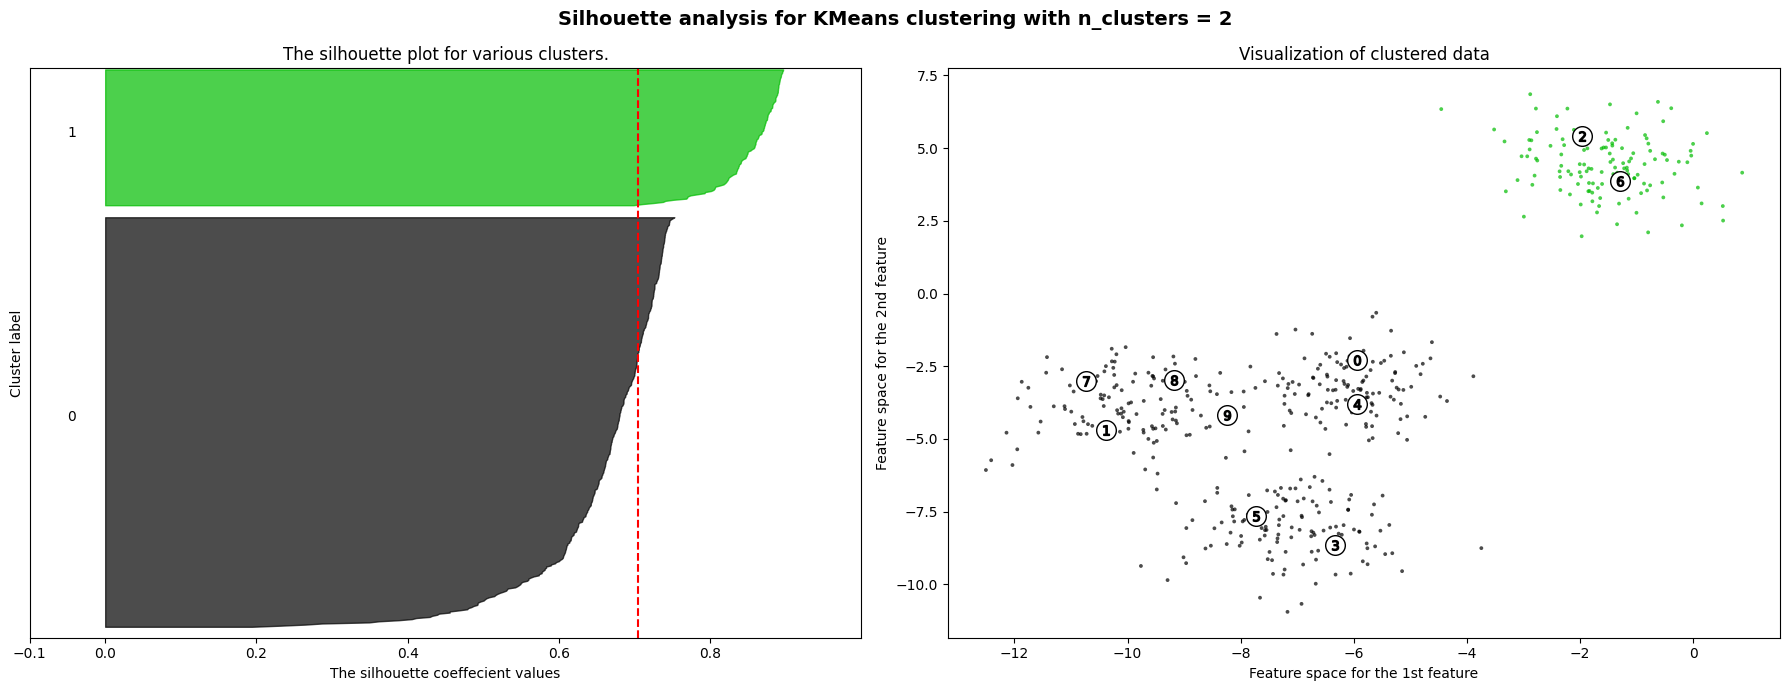

For Clusters: 3
Silhouette Coefficient: 0.588


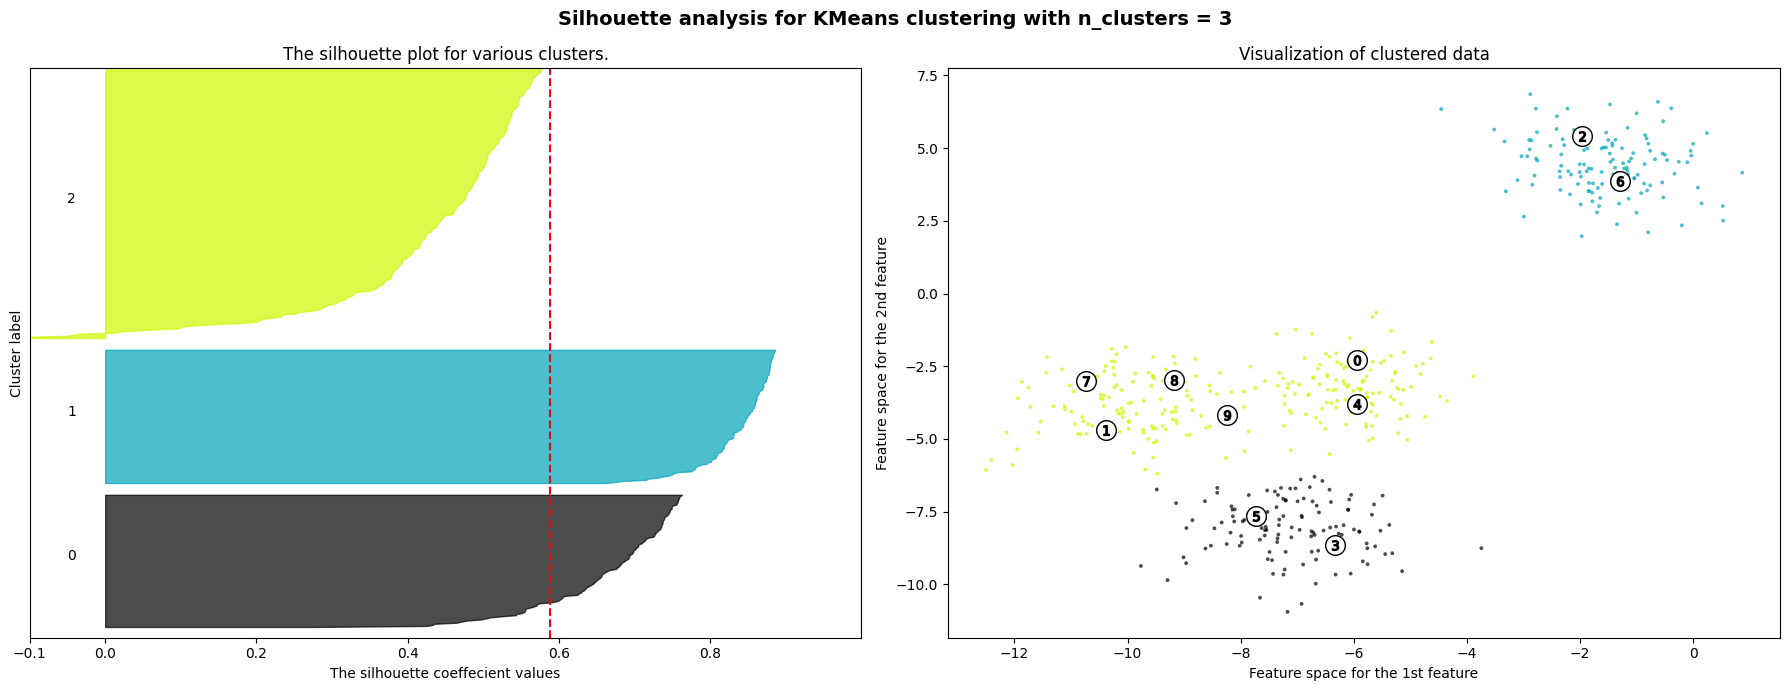

For Clusters: 4
Silhouette Coefficient: 0.651


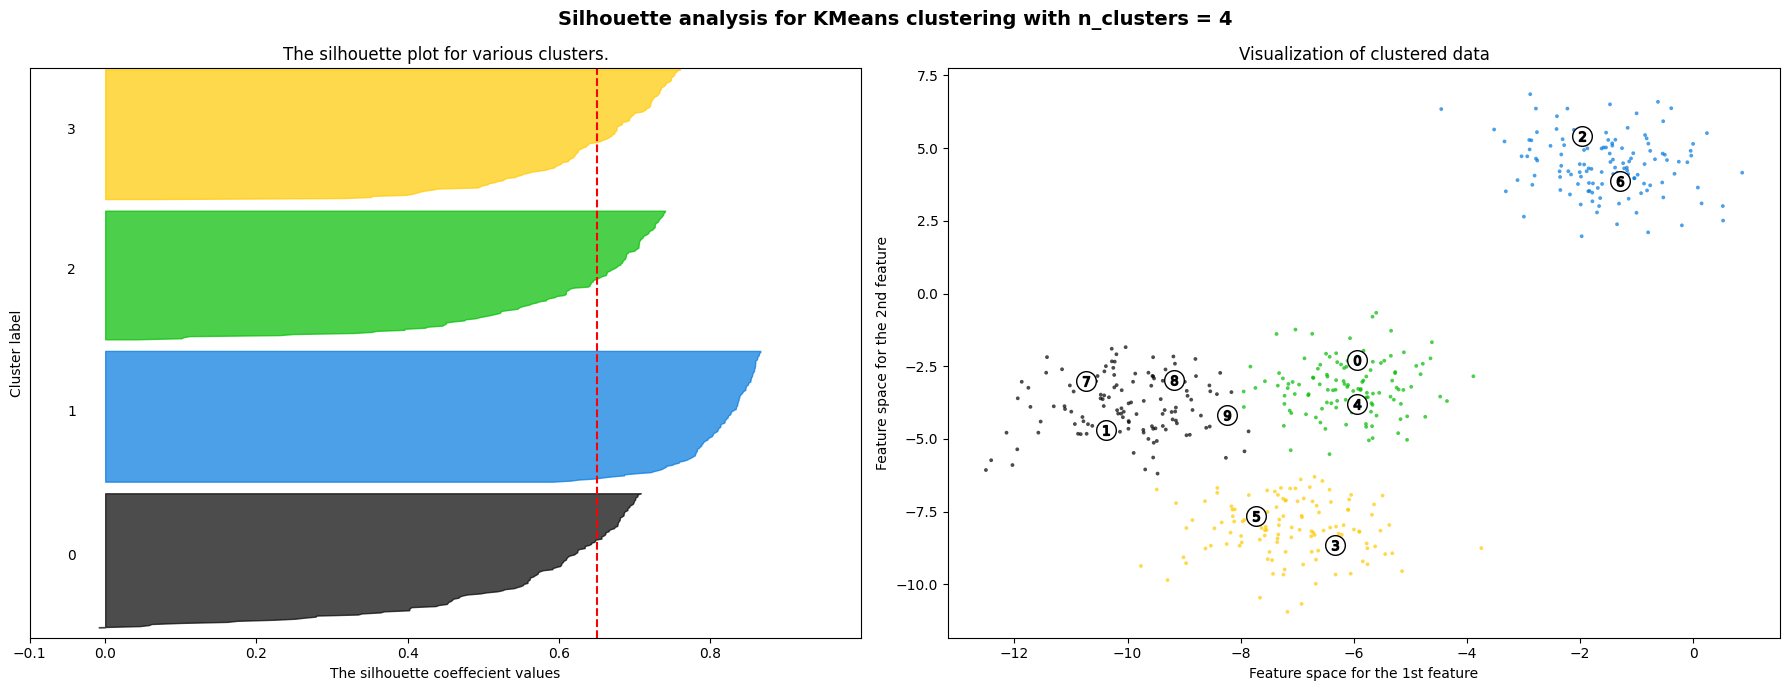

For Clusters: 5
Silhouette Coefficient: 0.561


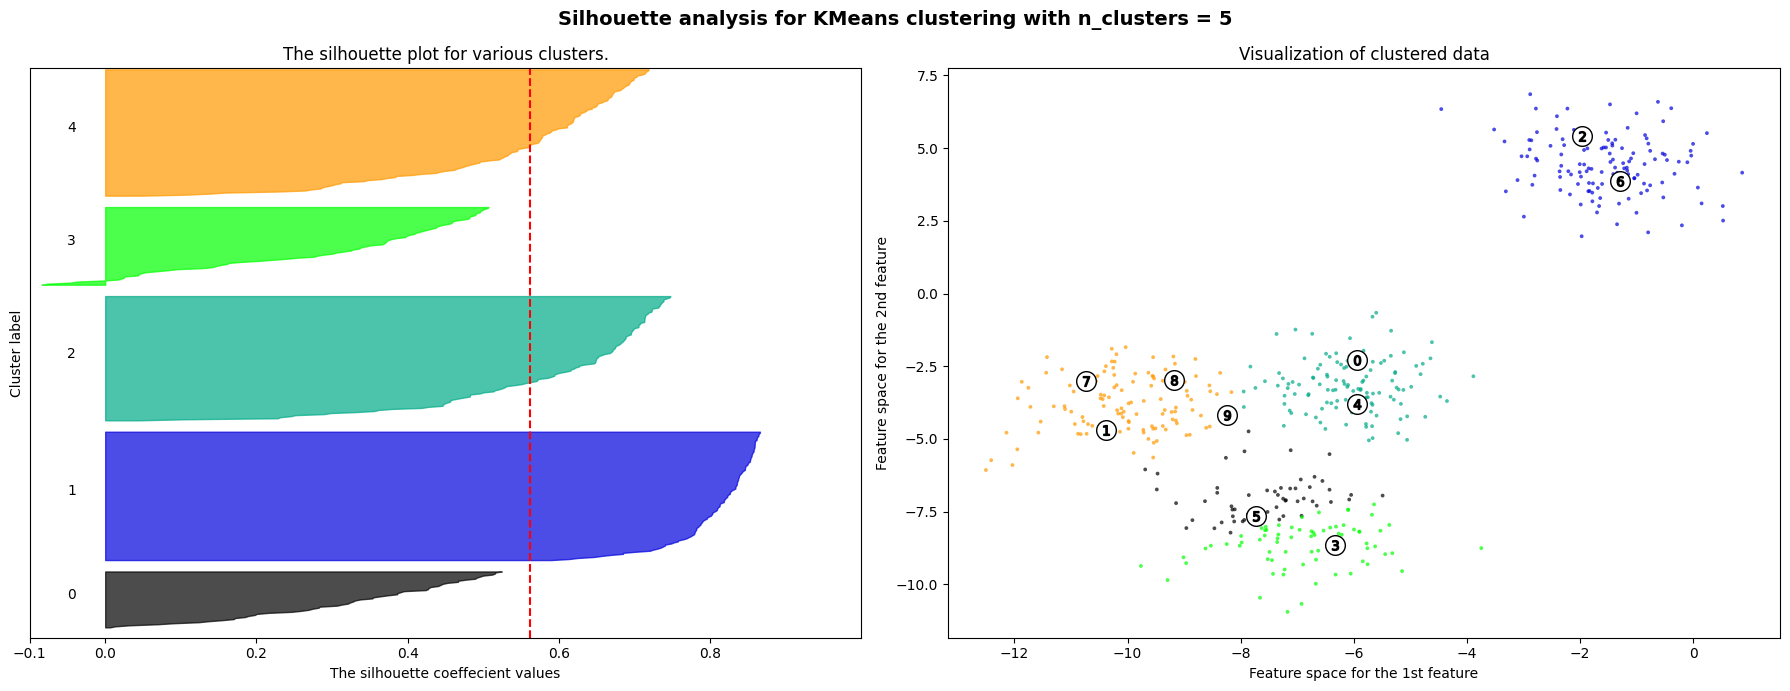

For Clusters: 6
Silhouette Coefficient: 0.486


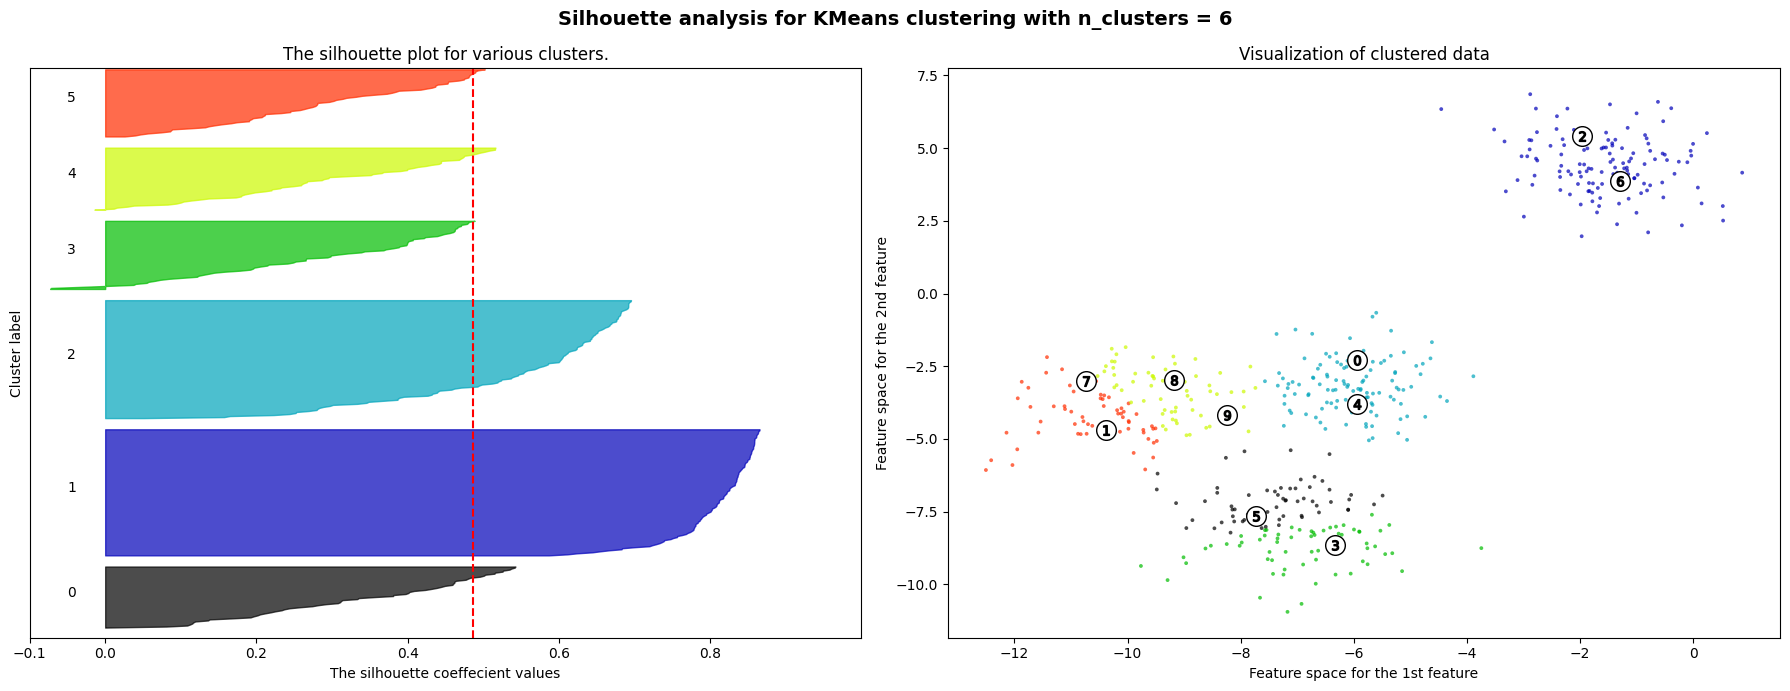

In [31]:
for n_clusters in range_n_clusters:
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)

    ax1.set_xlim([-0.1,1.0])
    ax1.set_ylim([0,len(X)+(n_clusters)*10])


    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    labels = clusterer.fit_predict(X)

    s_avg = silhouette_score(X,labels=labels)
    print("For Clusters:", n_clusters)
    print("Silhouette Coefficient:", round(s_avg,3))

    sample_silhouette_values = silhouette_samples(X,labels)

    y_lower = 10

    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
        sample_silhouette_values[labels == i]


        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)


        ax1.fill_betweenx(np.arange(y_lower,y_upper),0, ith_cluster_silhouette_values, facecolor = color, edgecolor = color, alpha=0.7)


        ax1.text(-0.05, y_lower+0.5*size_cluster_i,str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for various clusters.")
    ax1.set_xlabel("The silhouette coeffecient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=s_avg, color='red', linestyle = "--" )

    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8])

    colors = cm.nipy_spectral(labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle((f"Silhouette analysis for KMeans clustering with n_clusters = {n_clusters}"),
                fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()